### Imports

In [16]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

### Dataset

In [38]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Pequena Exploração

In [15]:
print('Número de imagens e tamanhos')
imagens_treino.shape, imagens_teste.shape, imagens_teste.shape, identificacoes_teste.shape

Número de imagens e tamanhos


((60000, 28, 28), (10000, 28, 28), (10000, 28, 28), (10000,))

### Exibição

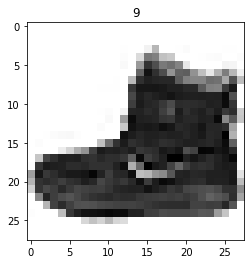

In [21]:
plt.title(identificacoes_treino[0])
plt.imshow(imagens_treino[0], cmap='binary')

In [24]:
print(identificacoes_treino.min(), identificacoes_treino.max())

0 9


In [36]:
# nomes das classificações retiradas do github original do dataset
nomes_classificacoes = ['camiseta','calca', 'pullover','vestido', 
                        'casaco','sandalia','camisa','tenis','bolsa','bota']

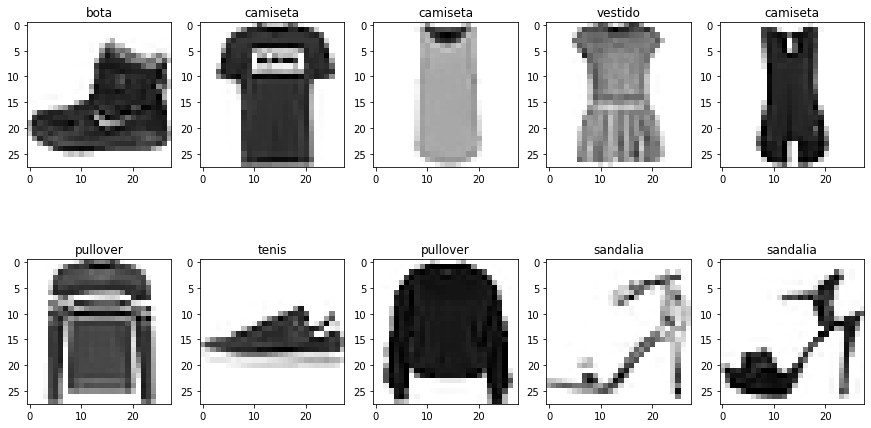

In [35]:
plt.figure(figsize=(15,8))
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
    plt.imshow(imagens_treino[imagem], cmap='binary')